## Jayden Yap Jean Hng p2112790 Part B Clustering

In [190]:
#dependencies
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

#installations
!pip install plotly
!pip install gower
!pip install prince
import plotly.graph_objects as go
import gower
import prince

#data scaler
from sklearn.preprocessing import StandardScaler
#ordinal encoder for categorical variables
from sklearn.preprocessing import OrdinalEncoder

#algorithms
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch

#for visualisation/interepration functions
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier

### Data Visualisation

In [191]:
data=pd.read_csv('data/Company_Employee.csv')
data.info()
df=data
df.columns=['Age','Gender','Business','Dept','HomeDistance','Education','Satisfaction','Married','Salary','Performance','LifeBalance','YearsService','Resign']
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

,Age,Gender,Business,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


In [192]:
for col in df:
    print(df[col].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Female' 'Male']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
[2 1 4 3 5]
[4 2 3 1]
['Single' 'Married' 'Divorced']
[5993 5130 2090 ... 9991 5390 4404]
[3 4]
[1 3 2 4]
[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
['Yes' 'No']


In [193]:
df.corr()
#education and age are moderately correlated 
#salary and age are highly correlated 
#age and years of service are moderately correlated 
#salary and year sof service are highly correlated 
#everything else are weak/no correlation

,Age,HomeDistance,Education,Satisfaction,Salary,Performance,LifeBalance,YearsService
Age,1.000000,-0.001686,0.208034,-0.004892,0.497855,0.001904,-0.021490,0.311309
HomeDistance,-0.001686,1.000000,0.021042,-0.003669,-0.017014,0.027110,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.011296,0.094961,-0.024539,0.009819,0.069114
Satisfaction,-0.004892,-0.003669,-0.011296,1.000000,-0.007157,0.002297,-0.019459,-0.003803
Salary,0.497855,-0.017014,0.094961,-0.007157,1.000000,-0.017120,0.030683,0.514285
Performance,0.001904,0.027110,-0.024539,0.002297,-0.017120,1.000000,0.002572,0.003435
LifeBalance,-0.021490,-0.026556,0.009819,-0.019459,0.030683,0.002572,1.000000,0.012089
YearsService,0.311309,0.009508,0.069114,-0.003803,0.514285,0.003435,0.012089,1.000000


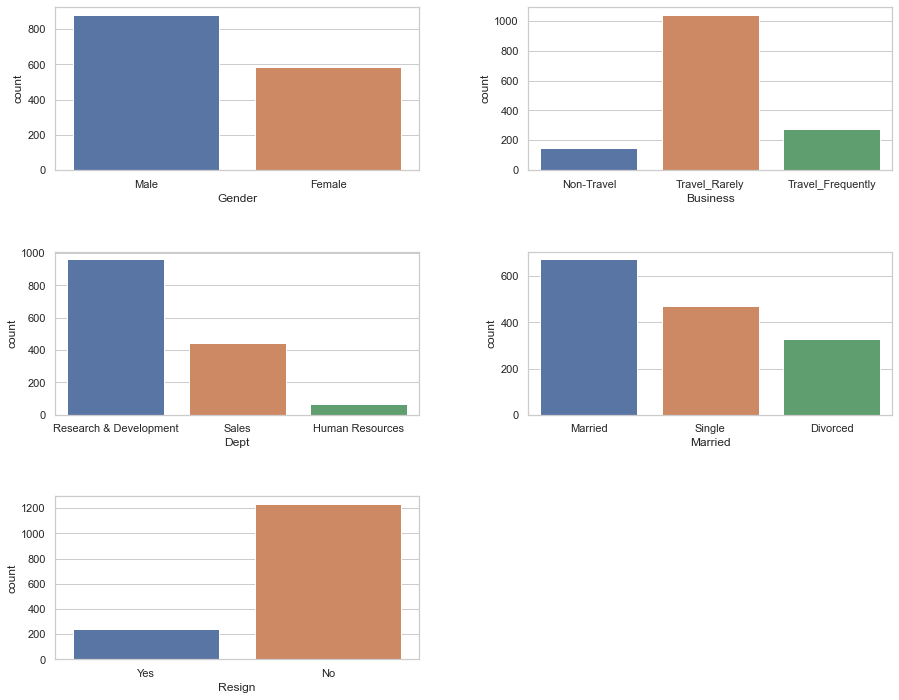

In [307]:
#Categorical Variables
plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.subplot(3,2,1)
sns.countplot(df['Gender'],order=['Male','Female'])
plt.subplot(3,2,2)
sns.countplot(df['Business'],order=['Non-Travel','Travel_Rarely','Travel_Frequently'])
plt.subplot(3,2,3)
sns.countplot(df['Dept'],order=['Research & Development','Sales','Human Resources'])
plt.subplot(3,2,4)
sns.countplot(df['Married'],order=['Married','Single','Divorced'])
plt.subplot(3,2,5)
sns.countplot(df['Resign'])
plt.show()

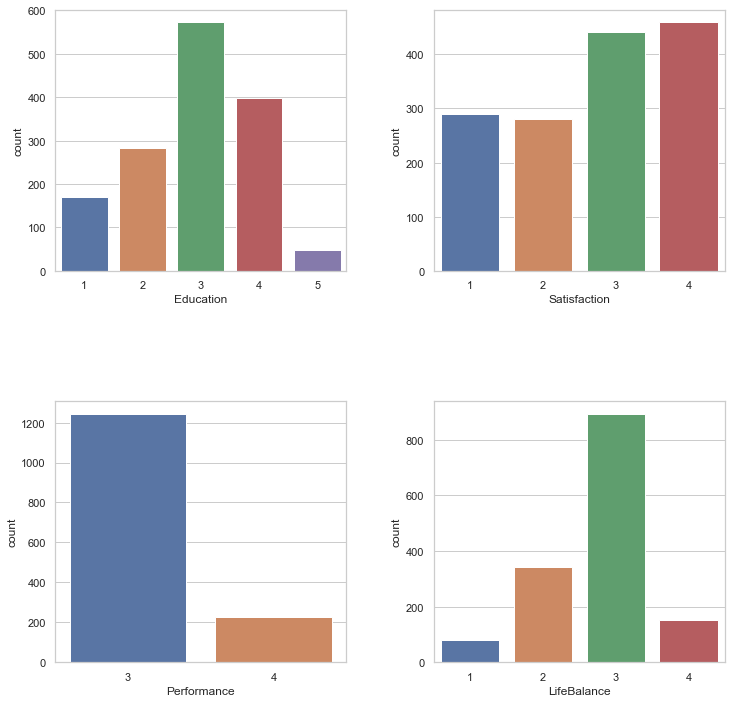

In [195]:
#Ratings 
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.subplot(2,2,1)
sns.countplot(df['Education'])
plt.subplot(2,2,2)
sns.countplot(df['Satisfaction'])
plt.subplot(2,2,3)
sns.countplot(df['Performance'])
plt.subplot(2,2,4)
sns.countplot(df['LifeBalance'])
plt.show()
#Education has almost normal distribution
#Satisfaction is above average for most employees
#Performance ratings only have 3 and 4 despite 1 and 2 being available ratings too
#Lifebalance has majority with 3 rating, meaning they have good life and don't spend too much time working

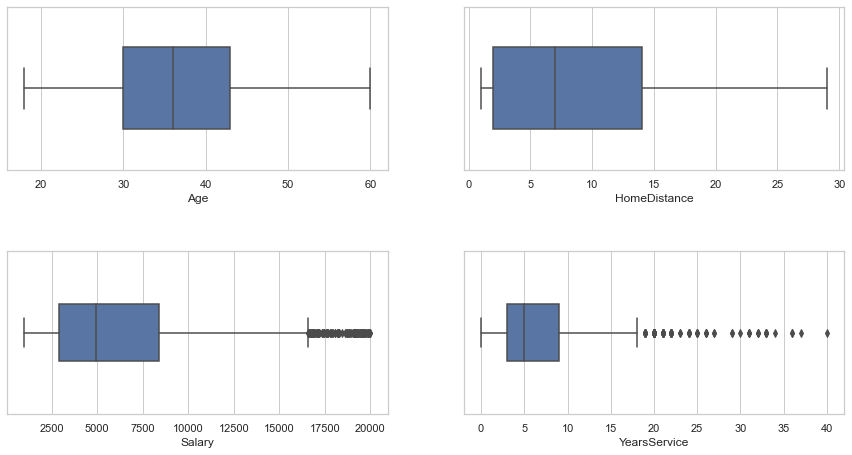

In [196]:
#Numerical Variables
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7.5))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(2,2,1)
sns.boxplot('Age',data=df,width=0.5)

plt.subplot(2,2,2)
sns.boxplot('HomeDistance',data=df,width=0.5)

plt.subplot(2,2,3)
sns.boxplot('Salary',data=df,width=0.35)
plt.subplot(2,2,4)
sns.boxplot('YearsService',data=df,width=0.35)
plt.show()
#Median age is ~36
#Median home distance is 7km (dsitance between dover and chinatown)
#Median salary is ~$5000, outliers with > $16000, likely executive employees
#Median years of service is 5 years, only 25% of employees have <3 years of service
#18 outliers with more than 17 years of service, likely founders or executive employees

### Data Processing

#### Encoding

##### Gower distance matrix

In [197]:
#gower distance metric is better suited for data with numerical and categorical data, will be used for some applicable models later
dfGower2=pd.DataFrame(gower.gower_matrix(df))  

In [309]:
dfGower2

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.628404,0.268191,0.459562,0.475796,0.366336,0.491025,0.587085,0.566784,0.463777,...,0.376252,0.417401,0.316949,0.506173,0.227646,0.521279,0.490645,0.540897,0.429457,0.471821
1,0.628404,0.000000,0.422571,0.293063,0.232740,0.311741,0.302913,0.285421,0.222111,0.325800,...,0.548946,0.542142,0.494071,0.357471,0.519388,0.232435,0.228756,0.178458,0.237409,0.285542
2,0.268191,0.422571,0.000000,0.374929,0.226461,0.231709,0.451159,0.327626,0.356953,0.295440,...,0.397434,0.360867,0.521037,0.292679,0.289629,0.327498,0.284477,0.327403,0.430858,0.237762
3,0.459562,0.293063,0.374929,0.000000,0.264719,0.250736,0.312049,0.442908,0.342829,0.281500,...,0.341735,0.596743,0.391529,0.340827,0.276238,0.208604,0.312662,0.306319,0.268383,0.228034
4,0.475796,0.232740,0.226461,0.264719,0.000000,0.270393,0.310101,0.250484,0.410711,0.191690,...,0.370606,0.440267,0.382488,0.273178,0.310825,0.231014,0.094646,0.139403,0.279489,0.126685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.521279,0.232435,0.327498,0.208604,0.231014,0.173442,0.457727,0.297564,0.238246,0.173070,...,0.428910,0.480622,0.351049,0.346134,0.423853,0.000000,0.259177,0.309428,0.273690,0.201656
1466,0.490645,0.228756,0.284477,0.312662,0.094646,0.327494,0.304014,0.312163,0.374777,0.197829,...,0.370560,0.361005,0.339124,0.213776,0.381295,0.259177,0.000000,0.186012,0.295377,0.158437
1467,0.540897,0.178458,0.327403,0.306319,0.139403,0.355950,0.213240,0.225052,0.271308,0.213464,...,0.407991,0.466248,0.473855,0.287621,0.354623,0.309428,0.186012,0.000000,0.311013,0.162901
1468,0.429457,0.237409,0.430858,0.268383,0.279489,0.268746,0.380798,0.518983,0.376644,0.276444,...,0.500457,0.388983,0.370399,0.341675,0.351852,0.273690,0.295377,0.311013,0.000000,0.288335


##### Ordinal Encoding

In [201]:
#encode business first (need to specify order)
df1=df.drop(['Business'],axis=1)
encoder=OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
df1[['Business']]=encoder.fit_transform(df[['Business']])
columnsList=df1.columns #backup columns

encoder=OrdinalEncoder()
df1=pd.DataFrame(encoder.fit_transform(df1),columns=columnsList)
df1

,Age,Gender,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign,Business
0,23.0,0.0,2.0,0.0,1.0,3.0,2.0,809.0,0.0,0.0,6.0,1.0,1.0
1,31.0,1.0,1.0,7.0,0.0,1.0,1.0,682.0,1.0,2.0,10.0,0.0,2.0
2,19.0,1.0,1.0,1.0,1.0,2.0,2.0,62.0,0.0,2.0,0.0,1.0,1.0
3,15.0,0.0,1.0,2.0,3.0,2.0,1.0,313.0,0.0,2.0,8.0,0.0,2.0
4,9.0,1.0,1.0,1.0,0.0,1.0,1.0,399.0,0.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18.0,1.0,1.0,22.0,1.0,3.0,1.0,210.0,0.0,2.0,5.0,0.0,2.0
1466,21.0,1.0,1.0,5.0,0.0,0.0,1.0,1070.0,0.0,2.0,7.0,0.0,1.0
1467,9.0,1.0,1.0,3.0,2.0,1.0,1.0,821.0,1.0,2.0,6.0,0.0,1.0
1468,31.0,1.0,2.0,1.0,2.0,1.0,1.0,730.0,0.0,1.0,9.0,0.0,2.0


#### Scaling

In [308]:
#scaling
scaler = StandardScaler()
df2=df1
df2[['Age','HomeDistance','Education','Satisfaction','Salary','Performance','LifeBalance','YearsService']]=scaler.fit_transform(
    df2[['Age','HomeDistance','Education','Satisfaction','Salary','Performance','LifeBalance','YearsService']]
)
X=df2
X

,Age,Gender,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign,Business
0,0.446350,0.0,2.0,-1.010909,-0.891688,1.153254,2.0,0.396200,-0.426230,-2.493820,-0.163801,1.0,1.0
1,1.322365,1.0,1.0,-0.147150,-1.868426,-0.660853,1.0,0.069401,2.346151,0.338096,0.497250,0.0,2.0
2,0.008343,1.0,1.0,-0.887515,-0.891688,0.246200,2.0,-1.525991,-0.426230,0.338096,-1.155378,1.0,1.0
3,-0.429664,0.0,1.0,-0.764121,1.061787,0.246200,1.0,-0.880114,-0.426230,0.338096,0.166724,0.0,2.0
4,-1.086676,1.0,1.0,-0.887515,-1.868426,-0.660853,1.0,-0.658818,-0.426230,0.338096,-0.824853,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.0,1.0,1.703764,-0.891688,1.153254,1.0,-1.145155,-0.426230,0.338096,-0.329064,0.0,2.0
1466,0.227347,1.0,1.0,-0.393938,-1.868426,-1.567907,1.0,1.067808,-0.426230,0.338096,0.001462,0.0,1.0
1467,-1.086676,1.0,1.0,-0.640727,0.085049,-0.660853,1.0,0.427078,2.346151,0.338096,-0.163801,0.0,1.0
1468,1.322365,1.0,2.0,-0.887515,0.085049,-0.660853,1.0,0.192916,-0.426230,-1.077862,0.331987,0.0,2.0


In [203]:
X.corr()
#we can see that Resign has moderate negative relationship with Salary (i.e less Salary= more Resign), same with Years of Service
#Department has a moderate correlation with Salary, meaning some depeartments earn more than others

,Age,Gender,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign,Business
Age,1.000000,-0.036311,-0.031882,-0.001686,0.208034,-0.004892,-0.095029,0.472198,0.001904,-0.021490,0.309796,-0.159205,-0.011807
Gender,-0.036311,1.000000,-0.041583,-0.001851,-0.016547,0.033252,-0.047183,-0.044121,-0.013859,-0.002753,-0.030797,0.029453,-0.044896
Dept,-0.031882,-0.041583,1.000000,0.017225,0.007996,0.021001,0.056073,0.157526,-0.024604,0.026383,0.023308,0.063991,-0.002640
HomeDistance,-0.001686,-0.001851,0.017225,1.000000,0.021042,-0.003669,-0.014437,0.011962,0.027110,-0.026556,0.009038,0.077924,-0.009696
Education,0.208034,-0.016547,0.007996,0.021042,1.000000,-0.011296,0.004053,0.124561,-0.024539,0.009819,0.067737,-0.031373,-0.008670
Satisfaction,-0.004892,0.033252,0.021001,-0.003669,-0.011296,1.000000,0.024360,0.002054,0.002297,-0.019459,-0.003929,-0.103481,0.008666
Married,-0.095029,-0.047183,0.056073,-0.014437,0.004053,0.024360,1.000000,-0.076762,0.005207,0.014708,-0.060648,0.162070,0.030915
Salary,0.472198,-0.044121,0.157526,0.011962,0.124561,0.002054,-0.076762,1.000000,-0.026355,0.034372,0.489707,-0.196165,-0.011644
Performance,0.001904,-0.013859,-0.024604,0.027110,-0.024539,0.002297,0.005207,-0.026355,1.000000,0.002572,0.003740,0.002889,0.001683
LifeBalance,-0.021490,-0.002753,0.026383,-0.026556,0.009819,-0.019459,0.014708,0.034372,0.002572,1.000000,0.012400,-0.063939,0.004209


### Dimension Reduction
Using FAMD, which is combination of PCA and Multiple Correspondence Analysis (MCA)

In [204]:
famd = prince.FAMD(n_components=16,n_iter=100,copy=True,check_input=True,engine='auto',random_state=1
)
famd.fit(df)
X_famd=famd.transform(df)
print(pd.DataFrame(famd.explained_inertia_.cumsum()))
#use 10 components to get >70% explained variance

           0
0   0.130790
1   0.208255
2   0.278980
3   0.349243
4   0.417339
5   0.483261
6   0.547997
7   0.611148
8   0.672126
9   0.730935
10  0.788329
11  0.840663
12  0.889911
13  0.932879
14  0.973775
15  1.000000


In [205]:
famd = prince.FAMD(n_components=10,n_iter=100,copy=True,check_input=True,engine='auto',random_state=1
)
famd.fit(df)
X_famd=famd.transform(df)
X_famd.columns=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
X_famd
#10 components retains ~73% variance

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-0.630364,1.473392,-0.309033,0.370125,0.247697,-0.898960,-1.614879,1.676506,0.608016,-0.201981
1,0.318399,-0.562387,0.431014,0.698727,0.802700,1.420040,1.370589,0.927878,0.316612,1.092906
2,-1.559017,0.273759,0.332049,-0.086739,-0.394369,-0.906245,0.181959,0.641484,0.805379,-0.017021
3,-0.097236,-0.041068,-0.639488,0.145499,0.919305,-0.373188,0.008431,-0.671536,-0.619752,1.608888
4,-1.052582,-1.127845,-0.507664,-0.550383,-0.763773,0.340537,0.493293,0.935342,-0.269487,0.371078
...,...,...,...,...,...,...,...,...,...,...
1465,-0.577643,-0.608393,0.847798,0.333158,0.530540,0.999384,-0.561243,-0.228221,-0.937318,0.810295
1466,0.285920,-0.641387,-0.337665,-0.184098,-1.058968,0.412588,0.923445,1.132861,-0.428031,0.172455
1467,-0.339999,-0.843992,-0.303914,0.243410,-0.268103,0.980049,1.002357,0.019226,1.245384,0.386358
1468,0.599593,0.428067,0.682593,-0.196023,-0.115752,-0.042349,-0.205258,0.546491,-0.412096,1.551794


### Test Models
Now we have 3 possible tests: 
X dataset (Encoded+Scaling),
FAMD dataset (X_famd)
Gower distance matrix (dfGower)

In [206]:
X.corr()

,Age,Gender,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign,Business
Age,1.000000,-0.036311,-0.031882,-0.001686,0.208034,-0.004892,-0.095029,0.472198,0.001904,-0.021490,0.309796,-0.159205,-0.011807
Gender,-0.036311,1.000000,-0.041583,-0.001851,-0.016547,0.033252,-0.047183,-0.044121,-0.013859,-0.002753,-0.030797,0.029453,-0.044896
Dept,-0.031882,-0.041583,1.000000,0.017225,0.007996,0.021001,0.056073,0.157526,-0.024604,0.026383,0.023308,0.063991,-0.002640
HomeDistance,-0.001686,-0.001851,0.017225,1.000000,0.021042,-0.003669,-0.014437,0.011962,0.027110,-0.026556,0.009038,0.077924,-0.009696
Education,0.208034,-0.016547,0.007996,0.021042,1.000000,-0.011296,0.004053,0.124561,-0.024539,0.009819,0.067737,-0.031373,-0.008670
Satisfaction,-0.004892,0.033252,0.021001,-0.003669,-0.011296,1.000000,0.024360,0.002054,0.002297,-0.019459,-0.003929,-0.103481,0.008666
Married,-0.095029,-0.047183,0.056073,-0.014437,0.004053,0.024360,1.000000,-0.076762,0.005207,0.014708,-0.060648,0.162070,0.030915
Salary,0.472198,-0.044121,0.157526,0.011962,0.124561,0.002054,-0.076762,1.000000,-0.026355,0.034372,0.489707,-0.196165,-0.011644
Performance,0.001904,-0.013859,-0.024604,0.027110,-0.024539,0.002297,0.005207,-0.026355,1.000000,0.002572,0.003740,0.002889,0.001683
LifeBalance,-0.021490,-0.002753,0.026383,-0.026556,0.009819,-0.019459,0.014708,0.034372,0.002572,1.000000,0.012400,-0.063939,0.004209


#### Functions

In [207]:
#RADARCHART FUNCTION

def radarChart(model,X,radarRange=2,usingCentroids=False,centroids=None):
	if usingCentroids:
		clusterCenters=centroids.T
	else:
		clusterCenters=pd.DataFrame(model.cluster_centers_).T
	categories = X.columns
	fig = go.Figure()
	for i in range(0,clusterCenters.shape[1]):
			fig.add_trace(go.Scatterpolar(
						r=clusterCenters[i],
						theta=categories,
						fill='toself',
						name=f"Cluster {i}"
			))
	fig.update_layout(
		polar=dict(
			radialaxis=dict(
				visible=False,
				range=[0, radarRange]
			)),
		showlegend=True
	)
	fig.show()

In [208]:
# FUNCTION FOR CLUSTER REPORT
#This function (set of functions) will use decision tree to find out what are the conditions for each cluster (eg. this vvariable > X and variable2> Y would be cluster1 etc)



def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])


In [209]:
#get centroids function from cluster labels
def getCentroids(df,labels):
    resultDF=pd.concat([df,pd.DataFrame(labels)],axis=1)
    resultDF=resultDF.groupby([0],as_index=False).mean()
    resultDF.drop([0],axis=1,inplace=True)
    resultDF.columns=range(0,len(resultDF.columns))
    return resultDF

#### KMeans
Tune number of clusters to get good balance of silhouette score and being able to interpret results

##### X

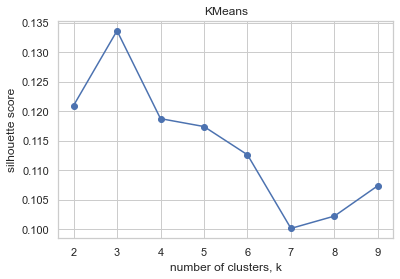

In [210]:
ks = range(2, 10)
scores = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=1)
    
    # Fit model to samples
    model.fit(X)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(X,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('KMeans')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()


In [211]:
model = KMeans(n_clusters=3,random_state=1)
# Fit model to samples
model.fit(X)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
#PCA + visualisation 
radarChart(model,X,radarRange=1.5)

0.13364815605274766


In [212]:
cluster_report(X,clusters)
#Cluster 0 (blue) has highest salary , likely due to highest years of service, age and education, they have lowest retirement rate
#Cluster 1 (red) has low attributes (salary,performance,education,yearsofservice) but highest marriage and resign rate
#Cluster 2 (green) has highest performance rating but low salary, resulting in a higher resign rate, should increase salary of this cluster

,class_name,instance_count,rule_list
1,0,586,[0.5692307692307692] (Performance <= 0.959960550069809) and (Salary <= 0.021797041408717632) and (Age > 0.8296068906784058)[0.9] (Performance <= 0.959960550069809) and (Salary > 0.021797041408717632) and (Age > -0.703419029712677)
0,1,660,[0.9449378330373002] (Performance <= 0.959960550069809) and (Salary <= 0.021797041408717632) and (Age <= 0.8296068906784058)[0.6818181818181818] (Performance <= 0.959960550069809) and (Salary > 0.021797041408717632) and (Age <= -0.703419029712677)
2,2,224,[0.9911504424778761] (Performance > 0.959960550069809)


##### FAMD

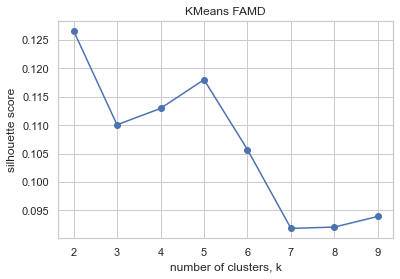

In [213]:
ks = range(2, 10)
scores = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=1)
    
    # Fit model to samples
    model.fit(X_famd)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(X_famd,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('KMeans FAMD')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()
#Choose 5 clusters

In [254]:
model = KMeans(n_clusters=5,random_state=1)
# Fit model to samples
model.fit(X_famd)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X_famd,clusters))
radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.11803006496554196


In [215]:
cluster_report(X,clusters)
#Cluster 4 had highest Education, resulting in highest Salary, also resulting in highest Satisfaction


,class_name,instance_count,rule_list
0,0,520,[0.9705304518664047] (Gender > 0.5) and (Resign <= 0.5) and (Performance <= 0.959960550069809) and (Salary <= 1.1115528345108032)
2,1,210,[0.8333333333333334] (Gender <= 0.5) and (Performance <= 0.959960550069809) and (Resign > 0.5)[0.9] (Gender > 0.5) and (Resign > 0.5)
3,2,203,[0.7340425531914894] (Gender <= 0.5) and (Performance <= 0.959960550069809) and (Resign <= 0.5) and (Salary > 1.0845341086387634)[0.831858407079646] (Gender > 0.5) and (Resign <= 0.5) and (Performance <= 0.959960550069809) and (Salary > 1.1115528345108032)
1,3,353,[0.9817073170731707] (Gender <= 0.5) and (Performance <= 0.959960550069809) and (Resign <= 0.5) and (Salary <= 1.0845341086387634)
4,4,184,[0.8404255319148937] (Gender <= 0.5) and (Performance > 0.959960550069809)[0.9363636363636364] (Gender > 0.5) and (Resign <= 0.5) and (Performance > 0.959960550069809)


##### Gower

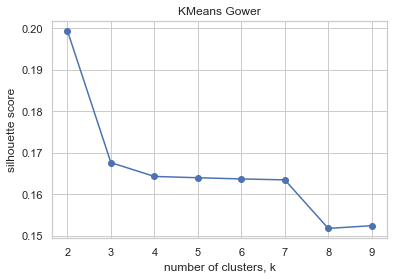

In [216]:
ks = range(2, 10)
scores = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=1)
    
    # Fit model to samples
    model.fit(dfGower2)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(dfGower2,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('KMeans Gower')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

In [257]:
model = KMeans(n_clusters=3,random_state=1)
# Fit model to samples
model.fit(dfGower2)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(dfGower2,clusters))
radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.16761929


In [258]:
cluster_report(X,clusters)
#Cluster 0 (blue) are average employees
#Cluster 1 (red) are employees at risk of resigning. They have high performance, years of service, and high home distance, but low salary, should increase salary
#Cluster 2 (green) are similar to average employees, but with more female employees, they also come from different department and a lower marriage rate


,class_name,instance_count,rule_list
1,0,423,[0.8838862559241706] (Gender <= 0.5) and (Resign <= 0.5) and (Performance <= 0.959960550069809)
2,1,382,[0.569620253164557] (Gender <= 0.5) and (Resign <= 0.5) and (Performance > 0.959960550069809)[0.8160919540229885] (Gender <= 0.5) and (Resign > 0.5)[0.7266666666666667] (Gender > 0.5) and (Resign > 0.5)
0,2,665,[0.909967845659164] (Gender > 0.5) and (Resign <= 0.5) and (Performance <= 0.959960550069809)[0.5272727272727272] (Gender > 0.5) and (Resign <= 0.5) and (Performance > 0.959960550069809)


#### Mean Shift

##### X

In [259]:
model = MeanShift(bandwidth=3.2)

# Fit model to samples
model.fit(X)
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=3)

0.16164977265318092


In [260]:
cluster_report(X,clusters)
#this algorithm gives uneven clusters
#generally main cluster (0) with most samples had no outstanding features
#other 3 clusters gave samples with outstanding attributes like salary, education or years of service
#however, it does not capture much variance in resign and the sample sizes in these clusters are too low


,class_name,instance_count,rule_list
0,0,1420,[0.9659863945578231] ALL
1,1,27,NaN
2,2,23,NaN


##### FAMD

In [267]:
model = MeanShift(bandwidth=2.36)

# Fit model to samples
model.fit(X_famd)
clusters=model.labels_
# Append score
print(silhouette_score(X_famd,clusters))
radarChart(model,X,radarRange=2.3,usingCentroids=True,centroids=getCentroids(X,clusters))

0.16407135419347338


In [268]:
cluster_report(X,clusters)
#similar, very uneven clustering

,class_name,instance_count,rule_list
0,0,1392,[0.9786324786324786] (YearsService <= 2.232509732246399)
3,1,13,NaN
1,2,33,[0.3787878787878788] (YearsService > 2.232509732246399)
2,3,32,NaN


##### Gower

In [223]:
model = MeanShift(bandwidth=3.6)

# Fit model to samples
model.fit(dfGower2)
clusters=model.labels_
# Append score
print(silhouette_score(dfGower2,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))
#very slow processing time

0.20522964


In [224]:
cluster_report(X,clusters)
#uneven clustering but good score

,class_name,instance_count,rule_list
0,0,1328,[0.9464720194647201] (Resign <= 0.5)[0.679324894514768] (Resign > 0.5)
2,1,32,NaN
3,2,22,NaN
1,3,88,NaN


#### Spectral Clustering

##### X

In [225]:
model = SpectralClustering(n_clusters=3)

# Fit model to samples
model.fit(X)
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))

radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.1631996956619767


In [226]:
cluster_report(X,clusters)
#cluster 2 has only 2 samples, not good

,class_name,instance_count,rule_list
1,0,222,[0.9823008849557522] (Performance > 0.959960550069809)
0,1,1245,[1.0] (Performance <= 0.959960550069809)
2,2,3,NaN


##### FAMD

In [227]:
model = SpectralClustering(n_clusters=3)

# Fit model to samples
model.fit(X_famd)
clusters=model.labels_
# Append score
print(silhouette_score(X_famd,clusters))

radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.11592500517258443


In [228]:
cluster_report(X,clusters)
#similar, only 2 samples in one cluster

,class_name,instance_count,rule_list
0,0,1253,[0.9983922829581994] (Performance <= 0.959960550069809)
2,1,2,NaN
1,2,215,[0.9513274336283186] (Performance > 0.959960550069809)


#### AgglomerativeClustering

##### X

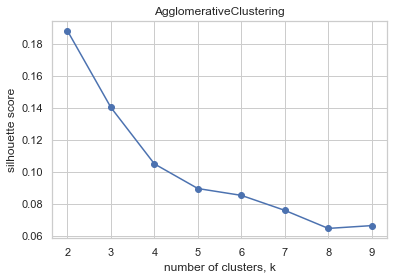

In [229]:
ks = range(2, 10)
scores = []

for k in ks:
    model = AgglomerativeClustering(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(X,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('AgglomerativeClustering')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()


In [230]:
model = AgglomerativeClustering(n_clusters=3).fit(X)
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.14011073917181582


In [231]:
cluster_report(X,clusters)
#decent results
#cluster 2 has highest years of service , age and has biggest salary as a result.
#cluster 1 has slightly higher resign rate than the other ones despite having highest performance. this could be because they are unhappy because they perform well but dont earn as much
#cluster 0 is more average employees

,class_name,instance_count,rule_list
0,0,1015,[0.9668508287292817] (Performance <= 0.959960550069809) and (Salary <= 1.071668028831482) and (Age <= 0.9391087293624878)[0.5392156862745098] (Performance <= 0.959960550069809) and (Salary <= 1.071668028831482) and (Age > 0.9391087293624878)[0.8909090909090909] (Performance <= 0.959960550069809) and (Salary > 1.071668028831482) and (YearsService <= 1.5714583992958069) and (Age <= 0.8296068906784058)
2,1,224,[0.9911504424778761] (Performance > 0.959960550069809)
1,2,231,[0.6947368421052632] (Performance <= 0.959960550069809) and (Salary > 1.071668028831482) and (YearsService <= 1.5714583992958069) and (Age > 0.8296068906784058)[0.9195402298850575] (Performance <= 0.959960550069809) and (Salary > 1.071668028831482) and (YearsService > 1.5714583992958069)


##### FAMD

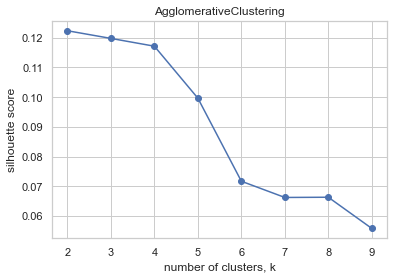

In [232]:
ks = range(2, 10)
scores = []

for k in ks:
    model = AgglomerativeClustering(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_famd)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(X_famd,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('AgglomerativeClustering')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()


In [271]:

model = AgglomerativeClustering(n_clusters=4).fit(X_famd)
clusters=model.labels_
# Append score
print(silhouette_score(X_famd,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.11717001432537118


In [270]:
cluster_report(X,clusters)
#decent result
#cluster 0 is more average empployees
#cluster 1 shows high home distance samples with high resign rate, this could be because travelling to work is an issue, they also have low salary
#cluster 2 has high performance 
#cluster 3 has high salary due to high years of service and age

,class_name,instance_count,rule_list
0,0,1109,[0.9532110091743119] (Performance <= 0.959960550069809) and (Salary <= 1.3264161348342896)
2,1,175,[0.7922077922077922] (Performance <= 0.959960550069809) and (Salary > 1.3264161348342896)
1,2,186,[0.8230088495575221] (Performance > 0.959960550069809)


##### Gower

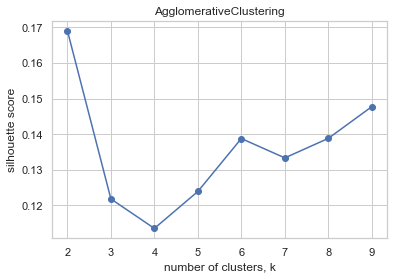

In [235]:
ks = range(2, 10)
scores = []

for k in ks:
    model = AgglomerativeClustering(n_clusters=k)
    
    # Fit model to samples
    model.fit(dfGower2)
    clusters=model.labels_
    # Append score
    scores.append(silhouette_score(dfGower2,clusters))
    
# Plot ks vs scores
plt.plot(ks, scores, '-o')
plt.title('AgglomerativeClustering')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()


In [236]:
model = AgglomerativeClustering(n_clusters=6).fit(dfGower2)
clusters=model.labels_
# Append score
print(silhouette_score(dfGower2,clusters))
radarChart(model,X,radarRange=1.6,usingCentroids=True,centroids=getCentroids(X,clusters))

0.1387597


In [237]:
cluster_report(X,clusters)
#hard to interpret from radarchart because too many clusters
#cluster 0, low performance, low salary majority males
#cluster 1 high performance, higher salaries, majority males
#cluster 2 high performance, low salary, high resign rate, majority female
#cluster 3 majority female
#cluster 4 highest resign rate, males, majority married 

,class_name,instance_count,rule_list
0,0,392,[0.9842105263157894] (Gender > 0.5) and (Resign <= 0.5) and (Business <= 1.5) and (Business > 0.5) and (Performance <= 0.959960550069809) and (Salary <= 1.3277027606964111)
1,1,342,[1.0] (Gender > 0.5) and (Resign <= 0.5) and (Business <= 1.5) and (Business <= 0.5)[0.7142857142857143] (Gender > 0.5) and (Resign <= 0.5) and (Business <= 1.5) and (Business > 0.5) and (Performance <= 0.959960550069809) and (Salary > 1.3277027606964111)[1.0] (Gender > 0.5) and (Resign <= 0.5) and (Business <= 1.5) and (Business > 0.5) and (Performance > 0.959960550069809)[1.0] (Gender > 0.5) and (Resign <= 0.5) and (Business > 1.5)
3,2,199,[0.8225806451612904] (Gender <= 0.5) and (Dept <= 1.5) and (Performance <= 0.959960550069809) and (Business > 1.5)[0.984375] (Gender <= 0.5) and (Dept <= 1.5) and (Performance > 0.959960550069809)
2,3,232,[0.8095238095238095] (Gender <= 0.5) and (Dept <= 1.5) and (Performance <= 0.959960550069809) and (Business <= 1.5)
5,4,148,[0.9866666666666667] (Gender > 0.5) and (Resign > 0.5)
4,5,157,[0.7777777777777778] (Gender <= 0.5) and (Dept > 1.5)


#### Birch Clustering

##### X
look for best parameters with best silhouette score

In [238]:
ks = range(3, 5)
ts= [0.2,0.5,0.8,1,1.5,2]
bs= [5,10,30,50,70,100]
scores = []
best=0
bestK=None 
bestT=None
bestB=None
for k in ks:
    for t in ts:
        for b in bs:
            model = Birch(n_clusters=k, threshold=t, branching_factor=b)
            # Fit model to samples
            model.fit(X)
            clusters=model.labels_
            # Append score
            score=silhouette_score(X,clusters)
            scores.append(score)
            if score>best:
                best=score
                bestK=k
                bestT=t
                bestB=b
print(f'best was {best} with {bestK} k and {bestT} t and {bestB} b')


best was 0.17706101315197054 with 3 k and 2 t and 50 b


In [274]:
model = Birch(n_clusters=3,threshold=2,branching_factor=50)
# Fit model to samples
model.fit(X)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.17706101315197054


In [240]:
cluster_report(X,clusters)
#cluster 0 average employees
#cluster 1 high performance , higher resign rate
#cluster 2 high years of service, age and salary
#likely best algorithm due to high sillhouete score!

,class_name,instance_count,rule_list
0,0,854,[0.6103896103896104] (Performance <= 0.959960550069809) and (Salary <= -0.37962423264980316) and (HomeDistance <= 1.1484897136688232) and (Age > 0.28209763020277023)[0.7333333333333333] (Performance <= 0.959960550069809) and (Salary <= -0.37962423264980316) and (HomeDistance > 1.1484897136688232)[0.9261213720316622] (Performance <= 0.959960550069809) and (Salary > -0.37962423264980316)
2,1,224,[0.9911504424778761] (Performance > 0.959960550069809)
1,2,392,[0.8562874251497006] (Performance <= 0.959960550069809) and (Salary <= -0.37962423264980316) and (HomeDistance <= 1.1484897136688232) and (Age <= 0.28209763020277023)


##### FAMD

In [241]:
ks = range(3, 5)
ts= [0.2,0.5,0.8,1,1.5,2]
bs= [20,50,75,100,150,200]
scores = []
best=0
bestK=None 
bestT=None
bestB=None
for k in ks:
    for t in ts:
        for b in bs:
            model = Birch(n_clusters=k, threshold=t, branching_factor=b)
            # Fit model to samples
            model.fit(X_famd)
            clusters=model.labels_
            # Append score
            score=silhouette_score(X_famd,clusters)
            scores.append(score)
            if score>best:
                best=score
                bestK=k
                bestT=t
                bestB=b
print(f'best was {best} with {bestK} k and {bestT} t and {bestB} b')


best was 0.1436773449139262 with 3 k and 0.5 t and 100 b


In [242]:
model = Birch(threshold=0.5,branching_factor=100,n_clusters=3)
# Fit model to samples
model.fit(X_famd)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X_famd,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.1436773449139262


In [243]:
cluster_report(X,clusters)
#similar to X but worse score

,class_name,instance_count,rule_list
0,0,1101,[0.9749303621169917] (Performance <= 0.959960550069809) and (Salary <= 1.2878179550170898)[0.569620253164557] (Performance <= 0.959960550069809) and (Salary > 1.2878179550170898) and (YearsService <= 0.57988141477108)
2,1,153,[0.9659090909090909] (Performance <= 0.959960550069809) and (Salary > 1.2878179550170898) and (YearsService > 0.57988141477108)
1,2,216,[0.9557522123893806] (Performance > 0.959960550069809)


##### Gower
not a great result , scores are good but clusters dont give much insight

In [244]:
ks = range(3, 5)
ts= [0.2,0.5,0.8,1,1.5,2]
bs= [20,50,75,100,150,200]
scores = []
best=0
bestK=None 
bestT=None
bestB=None
for k in ks:
    for t in ts:
        for b in bs:
            model = Birch(n_clusters=k, threshold=t, branching_factor=b)
            # Fit model to samples
            model.fit(dfGower2)
            clusters=model.labels_
            # Append score
            score=silhouette_score(dfGower2,clusters)
            scores.append(score)
            if score>best:
                best=score
                bestK=k
                bestT=t
                bestB=b
print(f'best was {best} with {bestK} k and {bestT} t and {bestB} b')


best was 0.17953898012638092 with 3 k and 2 t and 150 b


In [245]:
model = Birch(threshold=2,branching_factor=150,n_clusters=3)
# Fit model to samples
model.fit(dfGower2)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(dfGower2,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.17953898


In [246]:
cluster_report(X,clusters)
#uneven clustering so not suitable

,class_name,instance_count,rule_list
0,0,1253,[0.935117599351176] (Resign <= 0.5)[0.5632183908045977] (Resign > 0.5) and (Gender <= 0.5)[0.53125] (Resign > 0.5) and (Gender > 0.5) and (Dept <= 1.5)
1,1,165,[1.0] (Resign > 0.5) and (Gender > 0.5) and (Dept > 1.5)
2,2,52,NaN


#### OPTICS

##### X

In [247]:
min_samples = [2,5,8]
eps= [0.5,1,2]
algorithm=['ball_tree','kd_tree']
leaf_size=[10,20,30,40,50]
scores = []
best=0
bestS=None 
bestE=None
bestA=None
bestL=None
for s in min_samples:
    for e in eps:
        for a in algorithm:
            for l in leaf_size:
                model = OPTICS(min_samples=s, eps=e, algorithm=a, leaf_size=l, cluster_method='dbscan')
                # Fit model to samples
                model.fit(X)
                clusters=model.labels_
                # Append score
                if pd.DataFrame(clusters).nunique()[0]>1:
                    score=silhouette_score(X,clusters)
                    scores.append(score)
                    if score>best:
                        best=score
                        bestS=s
                        bestE=e
                        bestA=a
                        bestL=l

print(f'best was {best} with {bestS} s and {bestE} e and {bestA} a and {bestL} l')


best was 0.08645480137083975 with 8 s and 2 e and ball_tree a and 10 l


In [248]:
model = OPTICS(min_samples=8, eps=2, algorithm='ball_tree', leaf_size=10, cluster_method='dbscan').fit(X) 
clusters = model.labels_
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.08645480137083975


In [249]:
cluster_report(X,clusters)
#very uneven clustering and bad result

,class_name,instance_count,rule_list
1,-1,343,[0.6060606060606061] (Performance <= 0.959960550069809) and (LifeBalance <= -1.7858412861824036)[0.7256637168141593] (Performance > 0.959960550069809)
0,0,1065,[0.9463157894736842] (Performance <= 0.959960550069809) and (LifeBalance > -1.7858412861824036) and (HomeDistance <= 1.5186724066734314) and (YearsService <= 1.5714583992958069)[0.6395348837209303] (Performance <= 0.959960550069809) and (LifeBalance > -1.7858412861824036) and (HomeDistance <= 1.5186724066734314) and (YearsService > 1.5714583992958069)[0.5985915492957746] (Performance <= 0.959960550069809) and (LifeBalance > -1.7858412861824036) and (HomeDistance > 1.5186724066734314)
2,1,62,NaN


##### FAMD

In [250]:
min_samples = [2,5,8]
eps= [0.5,1,2]
algorithm=['ball_tree','kd_tree']
leaf_size=[5,10,20,30,50]
scores = []
best=0
bestS=None 
bestE=None
bestA=None
bestL=None
for s in min_samples:
    for e in eps:
        for a in algorithm:
            for l in leaf_size:
                model = OPTICS(min_samples=s, eps=e, algorithm=a, leaf_size=l, cluster_method='dbscan')
                # Fit model to samples
                model.fit(X_famd)
                clusters=model.labels_
                # Append score
                if pd.DataFrame(clusters).nunique()[0]>2:
                    score=silhouette_score(X_famd,clusters)
                    scores.append(score)
                    if score>best:
                        best=score
                        bestS=s
                        bestE=e
                        bestA=a
                        bestL=l

print(f'best was {best} with {bestS} s and {bestE} e and {bestA} a and {bestL} l')


best was 0.10306354563285902 with 2 s and 2 e and ball_tree a and 5 l


In [251]:
model = OPTICS(min_samples=2, eps=2, algorithm='ball_tree', leaf_size=10, cluster_method='dbscan').fit(X_famd) 
clusters = model.labels_
print(silhouette_score(X_famd,clusters))
radarChart(model,X,radarRange=2,usingCentroids=True,centroids=getCentroids(X,clusters))

0.10306354563285902


In [252]:
cluster_report(X,clusters)
#bad results

,class_name,instance_count,rule_list
1,-1,17,NaN
0,0,1451,[0.9870748299319728] ALL
2,1,2,NaN


### Final Model
Use Birch model with X (encoding+scaling)

#### Final Hyperparameter Tuning

In [277]:
ks = range(3, 5)
ts= [1,1.25,1.5,1.75,2,2.25,2.5]
bs= [30,35,40,45,50,55,60,70]
scores = []
best=0
bestK=None 
bestT=None
bestB=None
for k in ks:
    for t in ts:
        for b in bs:
            model = Birch(n_clusters=k, threshold=t, branching_factor=b)
            # Fit model to samples
            model.fit(X)
            clusters=model.labels_
            # Append score
            if pd.DataFrame(clusters).nunique()[0]>2:
                score=silhouette_score(X,clusters)
                scores.append(score)
                if score>best:
                    best=score
                    bestK=k
                    bestT=t
                    bestB=b
print(f'best was {best} with {bestK} k and {bestT} t and {bestB} b')


best was 0.17934489304391152 with 3 k and 2.25 t and 30 b


In [278]:
model = Birch(n_clusters=3,threshold=2.25,branching_factor=30)
# Fit model to samples
model.fit(X)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.17934489304391152


##### Use Original instead because better interpretation

In [310]:
model = Birch(n_clusters=3,threshold=2,branching_factor=50)
# Fit model to samples
model.fit(X)
#predict
clusters=model.labels_
# Append score
print(silhouette_score(X,clusters))
radarChart(model,X,radarRange=1.5,usingCentroids=True,centroids=getCentroids(X,clusters))

0.17706101315197187


In [311]:
cluster_report(X,clusters)
centroids=pd.DataFrame(getCentroids(X,clusters))
centroids.columns=X.columns
print("AVERAGE OF EACH CLUSTER (CENTERS)")
display(centroids)

,class_name,instance_count,rule_list
0,0,1135,[0.9886064855390009] (Performance <= 0.959960550069809) and (YearsService <= 1.7367212176322937)
1,1,224,[0.9911504424778761] (Performance > 0.959960550069809)
2,2,111,[0.941747572815534] (Performance <= 0.959960550069809) and (YearsService > 1.7367212176322937)


AVERAGE OF EACH CLUSTER (CENTERS)


,Age,Gender,Dept,HomeDistance,Education,Satisfaction,Married,Salary,Performance,LifeBalance,YearsService,Resign,Business
0,-0.090257,0.605286,1.268722,-0.007230,0.015344,0.003254,1.105727,-0.114362,-0.423787,-0.004977,-0.243157,0.164758,1.083700
1,-0.009744,0.584821,1.223214,0.044001,-0.058845,-0.000810,1.107143,-0.075962,2.346151,0.015713,-0.005916,0.165179,1.089286
2,0.942561,0.576577,1.252252,-0.014862,-0.038143,-0.031636,0.990991,1.322672,-0.401254,0.019187,2.498270,0.117117,1.108108


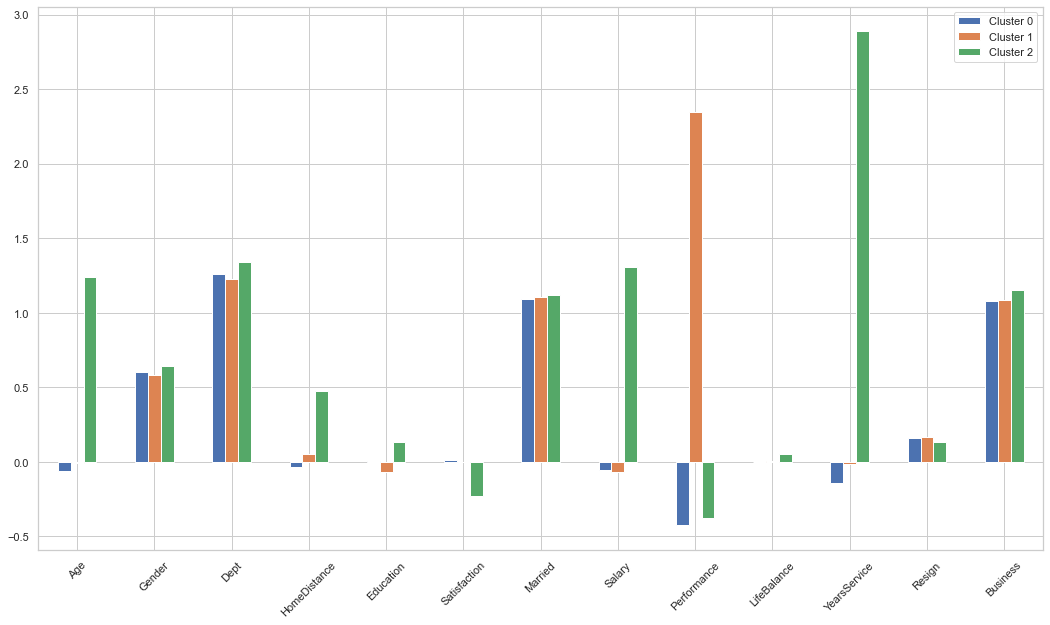

In [300]:
df2=centroids.T
df2.columns=['Cluster 0','Cluster 1','Cluster 2']
df2.plot(kind='bar',figsize=(18,10),rot=45)
plt.show()
#if bar can't be seen, value is extremely small

## Conclusion: 
Best model was Birch clustering with parameters (n_clusters=3,threshold=2,branching_factor=50)
This was with Ordinal Encoding and Standard Scaling on data
Cluster 0 consisted of average employees with no problems/outstanding qualities, in fact had lowest performance ratings (~3) but does not mean they perform bad
Cluster 1 consisted of employees with high performance but highest resignation rate, likely unhappy of not getting salary raise
Cluster 2 are the outstanding employees with high years of service, age and education, they do business travel trips the most and also get the most Salary of the 3 clusters. They have lowest resignation rate. Despite this, they actually live the furthest away from work and actually have the lowest Satisfaction rating.

I would recommend the company to increase the pay of employees with high performance rating. If they do not receive pay raise they are the most likely to resign. 